In [1]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import pandas as pd

In [4]:
merged_data = pd.read_csv('merged_fitness_data.csv')
merged_data['ActivityDate'] = pd.to_datetime(merged_data['ActivityDate'])

In [5]:
features = ['TotalSteps', 'TotalMinutesAsleep', 'ActivityIntensityRatio', 'AvgHeartRate']
X = merged_data[features]
y = merged_data['Calories']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [8]:
y_pred = rf_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [9]:
print(f"Mean Squared Error: {mse}")
print(f"R-squared Score: {r2}")

Mean Squared Error: 252593.83481723815
R-squared Score: 0.5136635692924549


In [10]:
feature_importance = pd.DataFrame({'feature': features, 'importance': rf_model.feature_importances_})
feature_importance = feature_importance.sort_values('importance', ascending=False)
print("Feature Importance:\n", feature_importance)

Feature Importance:
                   feature  importance
0              TotalSteps    0.441060
2  ActivityIntensityRatio    0.338275
1      TotalMinutesAsleep    0.121170
3            AvgHeartRate    0.099496


In [11]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [12]:
kmeans = KMeans(n_clusters=3, random_state=42)
merged_data['Cluster'] = kmeans.fit_predict(X_scaled)

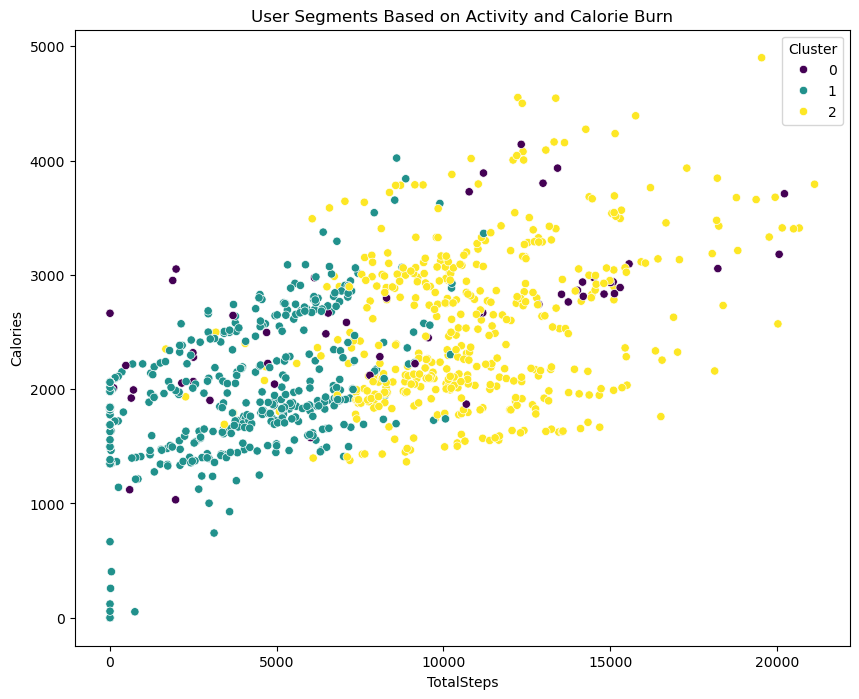

In [13]:
plt.figure(figsize=(10, 8))
sns.scatterplot(data=merged_data, x='TotalSteps', y='Calories', hue='Cluster', palette='viridis')
plt.title('User Segments Based on Activity and Calorie Burn')
plt.savefig('visualizations/user_segments.png')